In [29]:
import pandas as pd
import os
import nltk 
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import re

# DISCLAIMER: 
Some topics within this notebook can be sensitive as we are examining xenophobic comments from twitter during the rise of Covid-19. Any words used to examine the count of xenophobic comments is used solely for education purposes and is not meant to reinforce any negative stereotypes. 

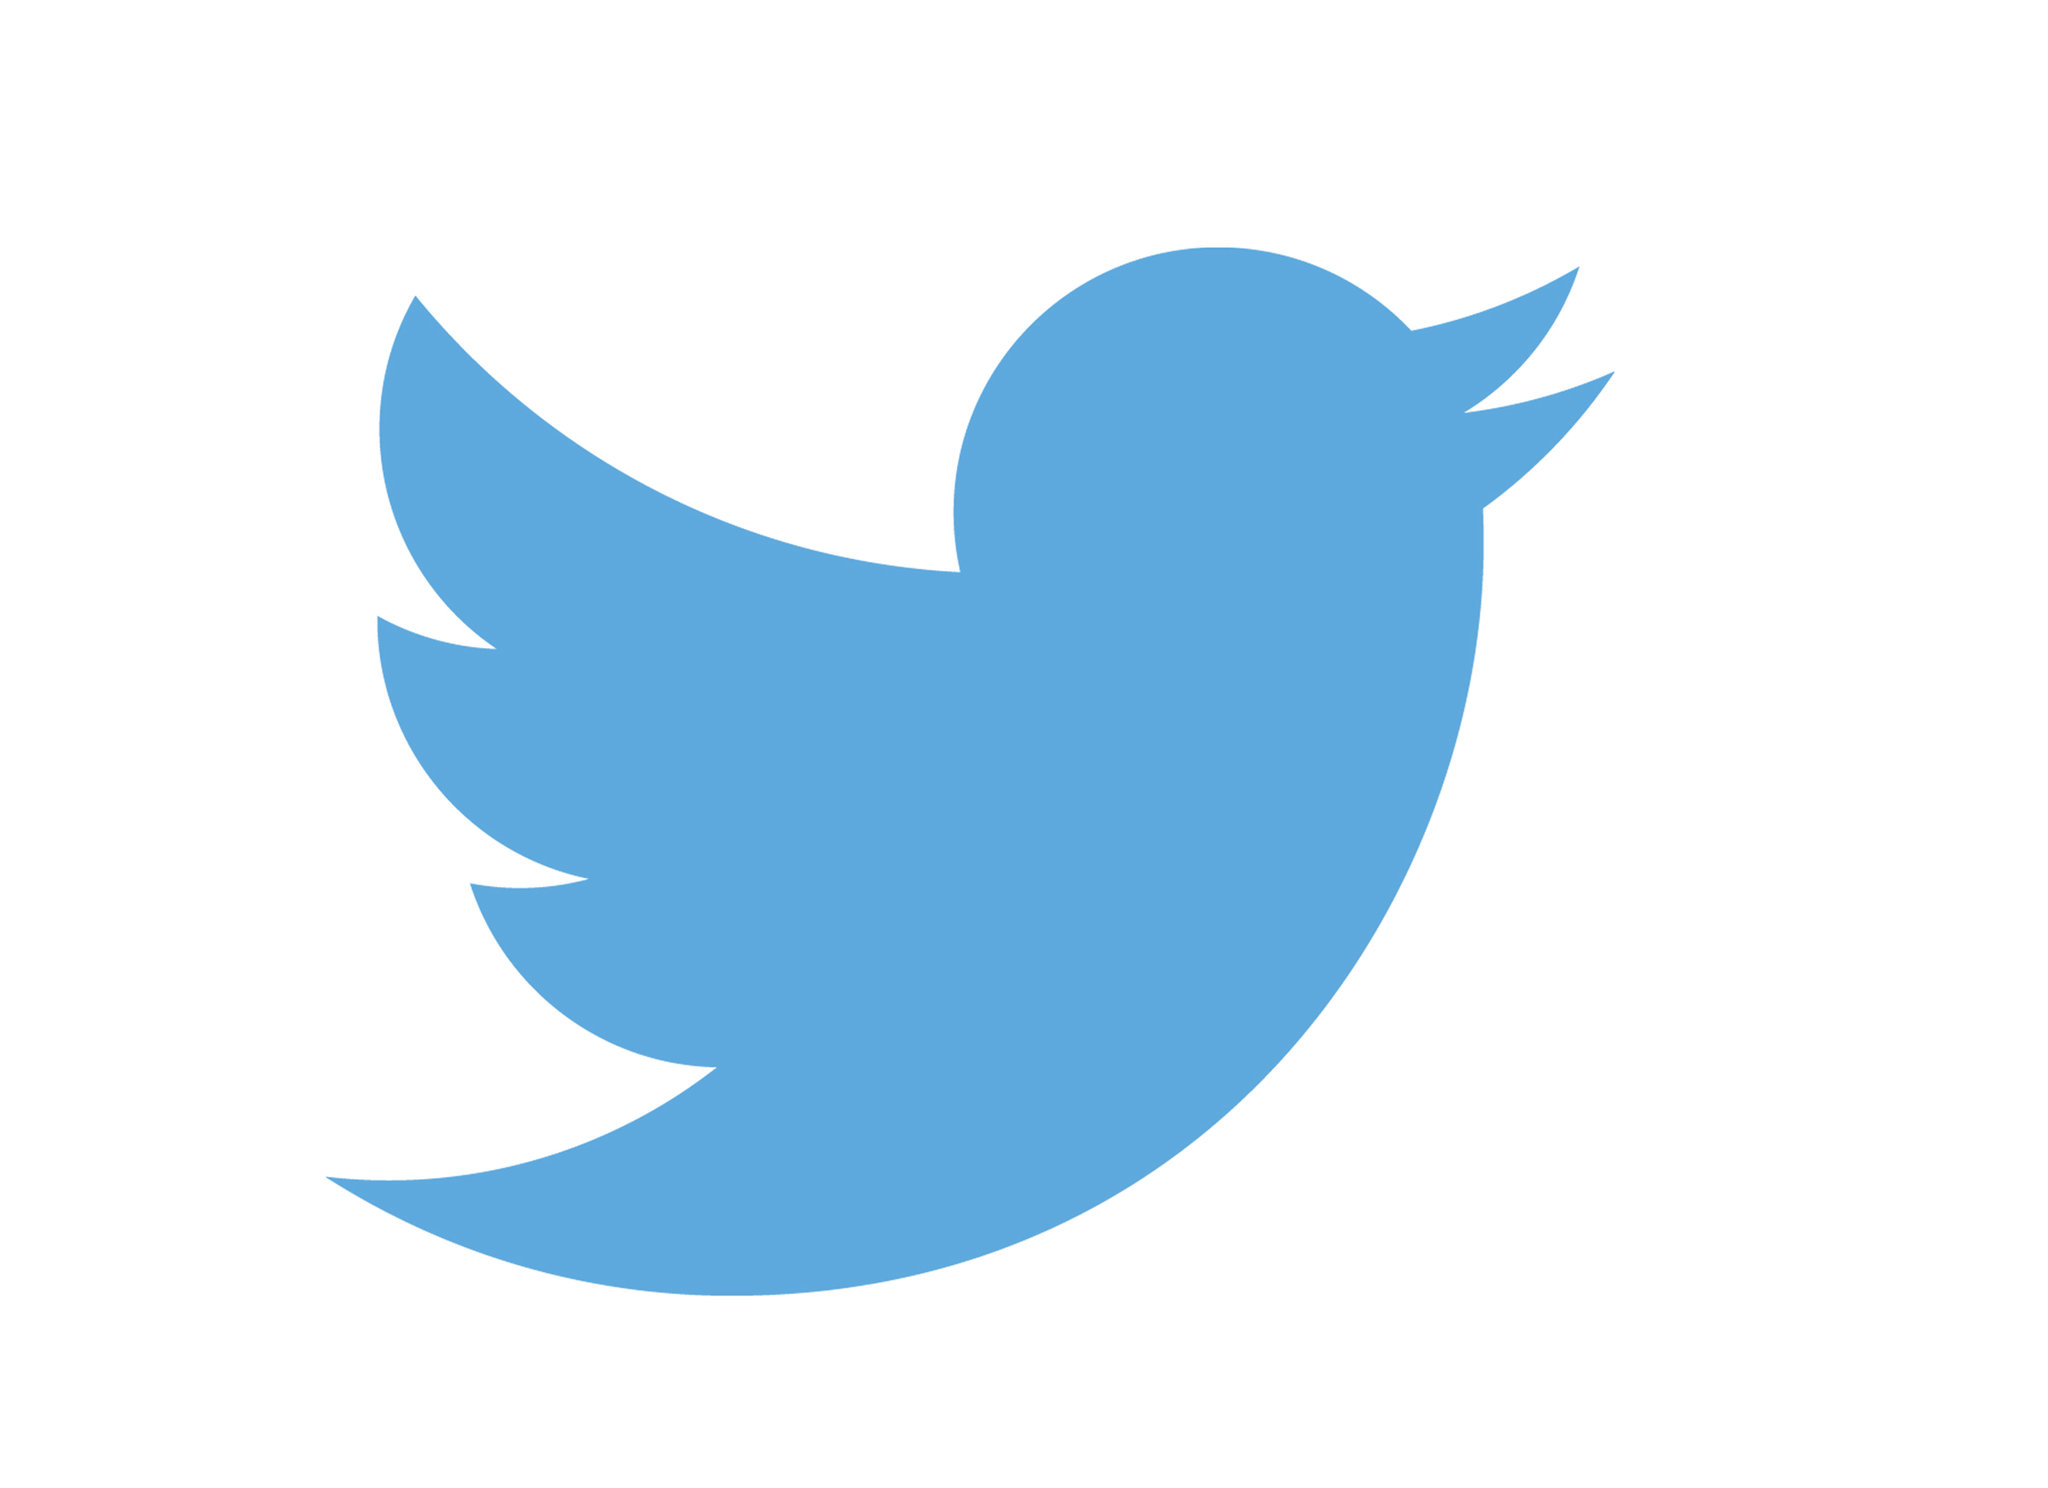

# Section 1: History Of COVID-19 and Purpose of Notebook
The COVID-19 coronavirus outbreak has caused a number of adverse effects. Mass hysteria and worldwide panic have dominated the global discourse, despite the World Health Organization and other organizations' efforts to openly and honestly provide factual facts about the illness.

People have accumulated supplies of hand sanitizer and are washing their hands like it's the newest fashion trend in order to protect themselves. On the internet, conspiracy theories are gaining popularity. Pharmacies all across the world are selling protective facemasks in large quantities. Sales of Corona beer have dropped, and financial markets are collapsing. Some major media sites have given in to fear mongering and obviously deceptive headlines, and the travel sector is in ruins. However, xenophobic attacks against people of Asian heritage have been one of the most destructive side consequences. 

Social media played a significant role in the spread of xenophobia during the COVID-19 pandemic, particularly on platforms like Twitter, where users can easily share their opinions and reactions with a global audience. As the virus spread, misinformation, rumors, and harmful rhetoric began to circulate rapidly. Many individuals and even public figures used social media to perpetuate unfounded fears about the virus’s origins, often associating it with people of Asian descent. This allowed hateful stereotypes and discriminatory language to gain visibility and traction.

On Twitter, hashtags and viral posts, sometimes accompanied by inflammatory language, fueled the stigmatization of Asian communities. The platform's design, which encourages quick sharing and broad reach, made it easy for these harmful messages to spread far and wide, amplifying the voices of those promoting hate. The constant exposure to negative, racist narratives created an environment where xenophobia was not only normalized but, in some cases, endorsed.
By analyzing tweets from this time, we can gain a deeper understanding of how social media acted as a catalyst for xenophobia. Examining these posts will allow us to track how fear and misinformation evolved, how online communities responded to and reinforced harmful beliefs, and how viral posts can shape public perception. This analysis can also shed light on the responsibility of social media platforms in moderating harmful content and fostering a more supportive, inclusive online space. Ultimately, studying these tweets offers valuable insights into the impact of racism during COVID-19, and the spread of harmful ideologies.


The dataset we used is a csv file containing 1000000+ tweets starting from March 2020. 

Data sourced from: https://www.kaggle.com/code/rahulgoel1106/starter-xenophobia-on-twitter-during-covid19/input 

#### Question 1.1: How did COVID-19 impact you or those around you in 2020? Did you remember any significant changes or precautions taken?

Answer Here: 

#### Question 1.2: What impacts of Covid-19 are still present today?


Answer Here:

#### Question 1.3: What social media platforms do you commonly go on? How often do you go on social media? Do you believe it does more harm or good?


Answer Here:

# Section 2: Looking Into the Data

In [42]:

df = pd.read_csv('Xenophobia.csv', nrows=10000, encoding='latin1')
df.head()

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count
0,1236048892484939776,wash yo hands\nstay updated\nwash em again\nea...,2020-03-06T21:59:55Z,0,0,God's love,493,225,12262
1,1236048892862574594,The President inside the with its leadership...,2020-03-06T21:59:55Z,0,0,"Atlanta, GA",10450,3722,15102
2,1236048899925774337,Itâs hard to focus on anything else with the...,2020-03-06T21:59:57Z,0,0,"Nashville, TN",6113,679,3932
3,1236049533655830528,"I mean, seriously. The Acting Deputy Secretary...",2020-03-06T22:02:28Z,0,0,"Merrimack Valley, Massachusetts, USA https://k...",6384,1593,189120
4,1236048901540585472,"""""Cuccinelli defended the decision, saying the...",2020-03-06T21:59:57Z,0,0,"Merrimack Valley, Massachusetts, USA https://k...",6384,1593,189120


We want to standardize the text format by removing any odd symbols.

In [92]:
#Just Run Code 
def remove_pattern(input_txt, pattern):
    if isinstance(input_txt, str):
        r = re.findall(pattern, input_txt)
        for i in r:
            input_txt = re.sub(i, '', input_txt)
    return input_txt


df['text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")
df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ", regex=True)
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in str(x).split() if len(w) > 3]))
df.head()

<>:10: SyntaxWarning: invalid escape sequence '\w'
<>:10: SyntaxWarning: invalid escape sequence '\w'
/var/folders/hp/7cmzbgn97j721jhx0v8hg8sh0000gn/T/ipykernel_79577/1178358248.py:10: SyntaxWarning: invalid escape sequence '\w'
  df['text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")


,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,Xenophobic
0,1236048892484939776,wash hand stay updat wash again healthi,2020-03-06T21:59:55Z,0,0,God's love,493,225,12262,False
1,1236048892862574594,presid insid with leadership learn more about ...,2020-03-06T21:59:55Z,0,0,"Atlanta, GA",10450,3722,15102,False
2,1236048899925774337,hard focu anyth with updat today month rememb ...,2020-03-06T21:59:57Z,0,0,"Nashville, TN",6113,679,3932,False
3,1236049533655830528,mean seriou deputi secretari homeland secur ba...,2020-03-06T22:02:28Z,0,0,"Merrimack Valley, Massachusetts, USA https://k...",6384,1593,189120,False
4,1236048901540585472,cuccinelli defend deci there enough capac land...,2020-03-06T21:59:57Z,0,0,"Merrimack Valley, Massachusetts, USA https://k...",6384,1593,189120,False


In [90]:
stemmer = PorterStemmer()
df['text'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df.head(5)

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,Xenophobic
0,1236048892484939776,wash hand stay updat wash again healthi,2020-03-06T21:59:55Z,0,0,God's love,493,225,12262,False
1,1236048892862574594,presid insid with leadership learn more about ...,2020-03-06T21:59:55Z,0,0,"Atlanta, GA",10450,3722,15102,False
2,1236048899925774337,hard focu anyth el with updat today month reme...,2020-03-06T21:59:57Z,0,0,"Nashville, TN",6113,679,3932,False
3,1236049533655830528,mean seriou act deputi secretari homeland secu...,2020-03-06T22:02:28Z,0,0,"Merrimack Valley, Massachusetts, USA https://k...",6384,1593,189120,False
4,1236048901540585472,cuccinelli defend deci say there enough capac ...,2020-03-06T21:59:57Z,0,0,"Merrimack Valley, Massachusetts, USA https://k...",6384,1593,189120,False


In [88]:
search_terms = ['alien', 'asian', 'china', 'criminal', 'floater', 'foreigner', 'greenhorn',
                'illegal', 'intruder', 'invader', 'migrant', 'newcomer', 'odd', 'outsider',
                'refugee', 'send her back', 'send back', 'send back', 'settler', 'stranger',
                'illegals', 'terrorist', 'parasite', 'chinese virus', 'kungflu', 'kung']
# Helper function to check if any xenophobic terms are in the text
def is_xenophobic(text):
    text_lower = text.lower()  # Convert text to lowercase to make it case-insensitive
    return any(term in text_lower for term in search_terms)

# Apply the function to the 'text' column to classify xenophobic content
df['Xenophobic'] = df['text'].apply(is_xenophobic)

df.head(5)

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,Xenophobic
0,1236048892484939776,wash hand stay updat wash again healthi,2020-03-06T21:59:55Z,0,0,God's love,493,225,12262,False
1,1236048892862574594,presid insid with leadership learn more about ...,2020-03-06T21:59:55Z,0,0,"Atlanta, GA",10450,3722,15102,False
2,1236048899925774337,hard focu anyth els with updat today month rem...,2020-03-06T21:59:57Z,0,0,"Nashville, TN",6113,679,3932,False
3,1236049533655830528,mean serious act deputi secretari homeland sec...,2020-03-06T22:02:28Z,0,0,"Merrimack Valley, Massachusetts, USA https://k...",6384,1593,189120,False
4,1236048901540585472,cuccinelli defend decis say there enough capac...,2020-03-06T21:59:57Z,0,0,"Merrimack Valley, Massachusetts, USA https://k...",6384,1593,189120,False


Number of tweets: 10000
Number of xenophobic tweets: 352


<Axes: title={'center': 'Count (Xenophobic) before'}, xlabel='Xenophobic'>

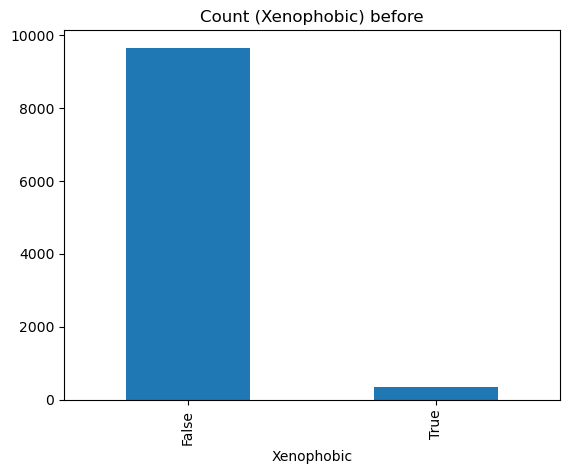

In [49]:
print(f"Number of tweets: {len(df)}")
print(f"Number of xenophobic tweets: {len(df.loc[ (df['Xenophobic'] == True)])}")
df['Xenophobic'].value_counts().plot(kind='bar', title='Count (Xenophobic) before')

This bar chart reveals that the ratio of xenophobic tweets is relatively low in comparison to the total volume of tweets. However, this shouldn't lead us to overlook the problem. Even though the frequency may seem minimal, any instance of injustice remains significant. Injustice doesn't need to be grand or widespread to be harmful; every occurrence of hate or discrimination contributes to a larger pattern of societal harm. Therefore, we must address these issues, no matter how small they appear, because these instances of injustices are a big contributor to the complexity of the concept of justice.

In [51]:
tweet = df.loc[(df['Xenophobic'] == True)].iloc[10]
print(f"Example tweet labeled Xenophobic: '{tweet.text}'")

Example tweet labeled Xenophobic: 'shall expect within come take control outbreak worri minnesota will quarantin safe home hope yanke were guilti blame east asian consum bat were covid find'


#### Question 2.1 Do you think this ratio labeled xenophobic vs non xenophobic tweets is reasonable or does it surprise you? Why or why not?

Answer Here: 

#### Question 2.2: What are some flaws that you can think of occurring when we manually try to filter out xenophobic words from tweets based on a specific word?


Answer Here: 

While filtering out certain words that may be associated with xenophobia manually, there are many flaws in doing so. First, these words alone cannot tell us if they were provided in a negative or positive context. For example, the term “asian” is not necessarily harmful language and can only tell us that there is some discourse about Asians rather than anti-Asian xenophobic tweets. These words that we chose are only guesses of what could possibly be xenophobic tweets. However, we can resample these tweets that contain these words we have guessed to see what is most common/word trends. 

/var/folders/hp/7cmzbgn97j721jhx0v8hg8sh0000gn/T/ipykernel_79577/2845656658.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[df['Xenophobic'] == 0].sample(n=3 * df['Xenophobic'].value_counts()[1], random_state=42),


<Axes: title={'center': 'Count (Xenophobic) after'}, xlabel='Xenophobic'>

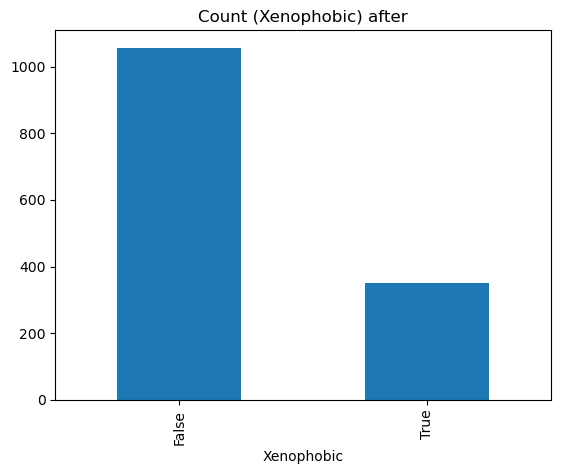

In [57]:
df_resample = pd.concat([
    df[df['Xenophobic'] == 0].sample(n=3 * df['Xenophobic'].value_counts()[1], random_state=42),
    df[df['Xenophobic'] == 1]
])

df_resample.reset_index(drop=True, inplace=True)
df_resample['Xenophobic'].value_counts().plot(kind='bar', title='Count (Xenophobic) after')

Now we have resampled the possible xenophobic words in a way that increases their proportion to see the most common words that are in similar tweets. 

In [59]:
from collections import Counter

top_words = Counter(" ".join(df_resample['text']).split())

temp = pd.DataFrame(top_words.most_common(10), columns=['Common_words', 'count'])
#CHANGE THE NUMBER WITHIN .most_common(_) METHOD TO SEE TOP -- NUMBERS

temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,china,361
1,covid,316
2,thi,305
3,that,225
4,from,214
5,with,207
6,have,190
7,case,187
8,test,174
9,about,161


YOUR TURN: Here is a quick section about how to make visualizations in Jupyter notebooks. 

Matplotlib and Seaborn are common python libraries used to make visualizations. Let's try making a bar plot using matplotlib, which we imported as plt. 

Go to : https://matplotlib.org/stable/plot_types/index and check out the different visualizations offered by matplotlib. 

We want to make a bar chart of the dataframe we just made above containing common words and their counts. Think about what each value would be to make the bar chart. Here is a skeleton structure of the code to help. 

HINT: plt.bar(data = ____, x = _____, height = _______)

<BarContainer object of 10 artists>

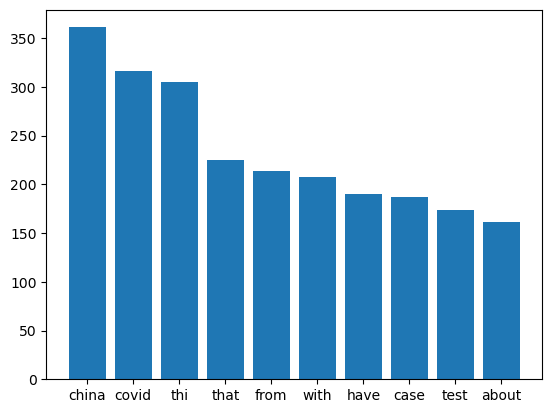

In [68]:
plt.bar(data=temp, x = 'Common_words', height='count') #This will be for the students to fill out, but it is filled in to show the results.

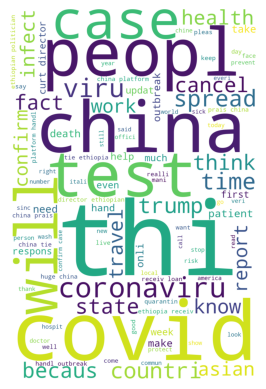

In [69]:
from wordcloud import WordCloud

text = df_resample['text'].values
cloud = WordCloud(
                  background_color='white',
                  max_words=100,
                  width=1000,
                  height=1500).generate(" ".join(text))

plt.imshow(cloud)
plt.axis('off')
plt.show()

#### Question 2.3: Look at the most common words amongst the possible xenophobic tweets during Covid-19? Does anything stand out in particular? 


Answer Here: 

#### Question 2.4: Look back at the original list of words that were deemed as xenophobic? What words in the top 50 words list that aren’t in the original word list that you believe have significance? 


Answer Here: 

# Section 3: Conclusion + Thinking Further

In conclusion, where direct hate speech against Asian Americans during Covid-19 was a clear issue, it is equally important to recognize the more subtle ways xenophobia was perpetauted. A huge aspect was the conversation surrounding China during this time, as it was often framed with harmful language. Inappropriate jokes and terms were used to associate the virsus with Chinese people, perpetuating the stigma of blame and fear onto all Asian. 

Our analysis of the Twitter discourse during this period highlights some critical weaknesses, particularly when attempting to filter out xenophobic content based solely on keywords. This approach has its flaws, as context plays a huge role in determining whether a mention of "Asian" or "China" is harmful or neutral. Despite these limitations, the broader conclusion remains clear: social media, like Twitter, played a crucial role in spreading fear, misinformation, and xenophobia during the pandemic. The spread of narratives amplified public fears and reinforced racial stereotypes towards the Asian community . The conversation on Twitter, whether through direct hate or indirect association, left a lasting impact on the perception of Asian communities during a global pandemic.

This project was made to bring attention to the injustice that was brought along with the pandemic and allow students to further relate this event to other forms of injustice they may see against Asian Americans throughout history, highlighting the structural injustice of Asian American hate.

#### Question 3.1: What can we infer about the discourse on Twitter during COVID-19 after this lesson? Can we assume correlation between anti-Asian xenophobia and COVID-19? Why or why not?


Answer Here: 

#### Question 3.2: What are some potential non-verbal forms of xenophobia that spread on social media during COVID-19 (e.g., memes, symbols, images, videos) and how might that affect our analysis as we are only looking at textual messages?



Answer Here: 

#### Question 3.3: What improvements could social media platforms make to their content moderation systems to ensure they are more effective at combating hate speech, specifically around race and ethnicity?



Answer Here: 

#### Question 3.4: How can social media platforms balance their responsibility to prevent hate speech with the need to protect free speech and open dialogue? (Think of any specific examples related to this topic)



Answer Here: 